In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta  #ベータ分布
import pandas as pd
%matplotlib inline

In [2]:
plt.style.use("ggplot")
np.random.seed(123)

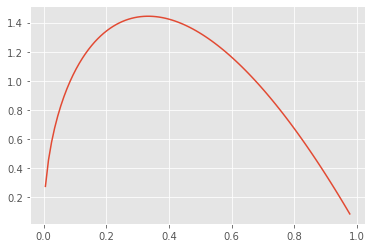

In [3]:
a, b = 1.5, 2.0
x = np.linspace(beta.ppf(0.001,a,b), beta.ppf(0.999, a,b), 100)
plt.plot(x, beta.pdf(x, a, b));

In [5]:
x.shape, x

((100,),
 array([0.00544068, 0.01525255, 0.02506442, 0.03487629, 0.04468816,
        0.05450003, 0.0643119 , 0.07412377, 0.08393564, 0.09374751,
        0.10355938, 0.11337125, 0.12318313, 0.132995  , 0.14280687,
        0.15261874, 0.16243061, 0.17224248, 0.18205435, 0.19186622,
        0.20167809, 0.21148996, 0.22130183, 0.2311137 , 0.24092557,
        0.25073744, 0.26054931, 0.27036118, 0.28017305, 0.28998492,
        0.29979679, 0.30960866, 0.31942053, 0.3292324 , 0.33904427,
        0.34885614, 0.35866801, 0.36847988, 0.37829175, 0.38810362,
        0.39791549, 0.40772736, 0.41753923, 0.4273511 , 0.43716297,
        0.44697484, 0.45678671, 0.46659858, 0.47641045, 0.48622232,
        0.49603419, 0.50584606, 0.51565793, 0.52546981, 0.53528168,
        0.54509355, 0.55490542, 0.56471729, 0.57452916, 0.58434103,
        0.5941529 , 0.60396477, 0.61377664, 0.62358851, 0.63340038,
        0.64321225, 0.65302412, 0.66283599, 0.67264786, 0.68245973,
        0.6922716 , 0.70208347, 0.71189

In [10]:
np.random.rand()

0.7194689697855631

ランダムウォーク

In [11]:
theta = 0.8  # 適当なスタート位置
NMCS = 20000  # 回数
epsilon = 0.5  # この調整がキモ　（難しいところ）
theta_mcs = [theta]  # ステップごとのθの値をリストに格納する

for i in range(NMCS):  # モンテカルロループをまわす
    theta_new = theta + epsilon * np.random.randn()
    if beta.pdf(theta_new, a, b) > beta.pdf(theta, a, b):
        theta = theta_new
    else:
        r = beta.pdf(theta_new, a, b) / beta.pdf(theta, a, b)
        if np.random.rand() < r:
            theta = theta_new
    theta_mcs.append(theta)

df = pd.DataFrame(theta_mcs)

In [12]:
df.head()

,0
0,0.800000
1,0.800000
2,0.774241
3,0.774241
4,0.559785


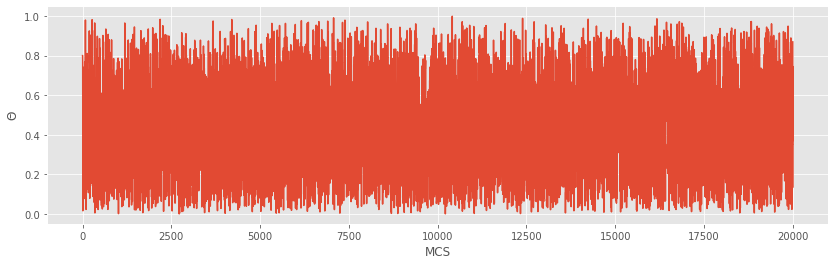

In [16]:
plt.figure(figsize=(14,4))

plt.plot(df[0])
plt.xlabel("MCS")
plt.ylabel("$\Theta$")
plt.show();

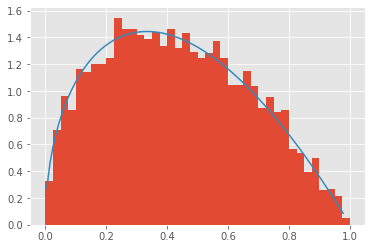

In [17]:
#plt.hist(df[0][1000:], normed=True, bins=40)
plt.hist(df[0][1000:], density=True, bins=40)
x = np.linspace(beta.ppf(0.001,a,b), beta.ppf(0.999, a,b), 100)
plt.plot(x, beta.pdf(x, a, b));